**Download Dataset**

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="bpttwR4eVSFh0Rbif3n3")
project = rf.workspace("prova-delgj").project("wonderlandbook")
version = project.version(1)
dataset = version.download("folder")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 135.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to WonderlandBook-1 in folder:: 100%|██████████| 681/681 [00:00<00:00, 8636.28it/s]


**Install Modules**

In [2]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

**Check torch version**

In [3]:
import torch
import torchvision
print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")

torch version: 2.6.0+cu124
torchvision version: 0.21.0+cu124


**Set device**

In [4]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

**Set folders**

In [5]:
trainDir = "./WonderlandBook-1/train"
testDir = "./WonderlandBook-1/test"
validDir = "./WonderlandBook-1/valid"

**Load Model weights**

In [7]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT

**Set transforms**

In [8]:
autoTransforms = weights.transforms()
autoTransforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

**Make Dataloaders**

In [9]:
from torchvision import datasets
from torch.utils.data import DataLoader
import os

trainData = datasets.ImageFolder(trainDir, autoTransforms)
testData = datasets.ImageFolder(testDir, autoTransforms)

trainDataloader = DataLoader(
  trainData,
  batch_size=32,
  shuffle=True,
  num_workers=os.cpu_count(),
  pin_memory=True,
)

testDataloader = DataLoader(
  testData,
  batch_size=32,
  shuffle=True,
  num_workers=os.cpu_count(),
  pin_memory=True,
)

classNames = trainData.classes

**Load pretraines model on device**

In [10]:
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 203MB/s]


**Set the trainable parameters**

In [11]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.features.parameters():
    param.requires_grad = False

**Rebuild the classifier layer**

In [12]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(classNames)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

**Loss Function and Optimizer**

In [13]:
from torch import nn
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) #lr=0.001

**Functions to train and test the model on a single batch of data**

In [14]:
def trainStep(model, dataloader, lossFn, optimizer, device):
  # Put model in train mode
  model.train()

  # Setup train loss and train accuracy values
  trainLoss, trainAcc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    yPred = model(X)

    # 2. Calculate  and accumulate loss
    loss = lossFn(yPred, y)
    trainLoss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # !!!da capire ste due righe eh
    # Calculate and accumulate accuracy metric across all batches
    yPredClass = torch.argmax(torch.softmax(yPred, dim=1), dim=1)
    trainAcc += (yPredClass == y).sum().item()/len(yPred)

  # Adjust metrics to get average loss and accuracy per batch
  trainLoss = trainLoss / len(dataloader)
  trainAcc = trainAcc / len(dataloader)
  return trainLoss, trainAcc

In [15]:
def testStep(model, dataloader, lossFn, device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  testLoss, testAcc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      testPredLogits = model(X)

      # 2. Calculate and accumulate loss
      loss = lossFn(testPredLogits, y)
      testLoss += loss.item()

      # Calculate and accumulate accuracy
      testPredLabels = testPredLogits.argmax(dim=1)
      testAcc += ((testPredLabels == y).sum().item()/len(testPredLabels))

  # Adjust metrics to get average loss and accuracy per batch
  testLoss = testLoss / len(dataloader)
  testAcc = testAcc / len(dataloader)
  return testLoss, testAcc

**Training Loop**

In [16]:
from tqdm.auto import tqdm

# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Create empty results dictionary
results = {"train_loss": [],
            "train_acc": [],
            "test_loss": [],
            "test_acc": []
}

# Make sure model on target device
model.to(device)

epochs = 10

# Loop through training and testing steps for a number of epochs
for epoch in tqdm(range(epochs)):
    train_loss, train_acc = trainStep(model=model,
                                       dataloader=trainDataloader,
                                       lossFn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = testStep(model=model,
                                    dataloader=testDataloader,
                                    lossFn=loss_fn,
                                    device=device)

    # Print out what's happening
    print(
      f"Epoch: {epoch+1} | "
      f"train_loss: {train_loss:.4f} | "
      f"train_acc: {train_acc:.4f} | "
      f"test_loss: {test_loss:.4f} | "
      f"test_acc: {test_acc:.4f}"
    )

    # Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.5621 | train_acc: 0.4263 | test_loss: 1.2050 | test_acc: 0.5556
Epoch: 2 | train_loss: 0.9979 | train_acc: 0.7284 | test_loss: 0.6623 | test_acc: 0.8519
Epoch: 3 | train_loss: 0.6710 | train_acc: 0.8851 | test_loss: 0.4663 | test_acc: 0.9259
Epoch: 4 | train_loss: 0.5153 | train_acc: 0.9161 | test_loss: 0.3486 | test_acc: 0.9630
Epoch: 5 | train_loss: 0.3996 | train_acc: 0.9337 | test_loss: 0.2826 | test_acc: 0.9630
Epoch: 6 | train_loss: 0.3267 | train_acc: 0.9634 | test_loss: 0.2258 | test_acc: 0.9630
Epoch: 7 | train_loss: 0.2764 | train_acc: 0.9635 | test_loss: 0.2065 | test_acc: 0.9630
Epoch: 8 | train_loss: 0.2389 | train_acc: 0.9705 | test_loss: 0.1844 | test_acc: 0.9630
Epoch: 9 | train_loss: 0.2024 | train_acc: 0.9809 | test_loss: 0.1589 | test_acc: 0.9630
Epoch: 10 | train_loss: 0.1892 | train_acc: 0.9732 | test_loss: 0.1479 | test_acc: 0.9630
[INFO] Total training time: 64.332 seconds


**Plot Accuracy and Loss curves**

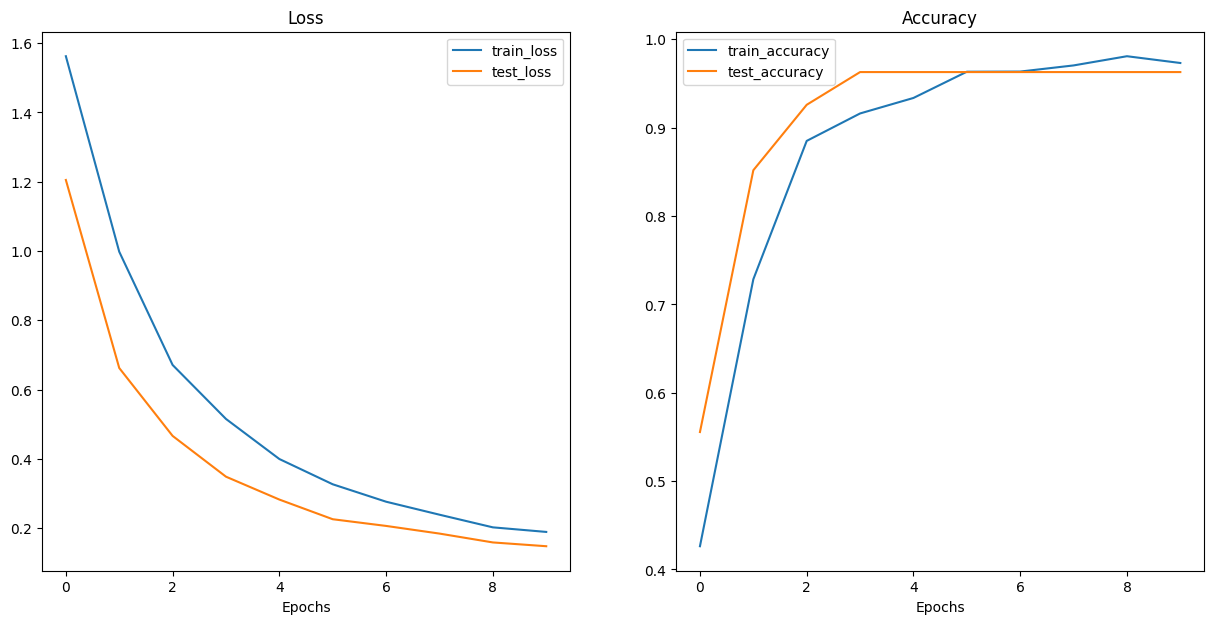

In [17]:
import matplotlib.pyplot as plt

def plot_loss_curves(results):
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  plt.figure(figsize=(15, 7))

  # Plot loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

# Plot the loss curves of our model
plot_loss_curves(results)

**Test model on Valid images**

In [18]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):


    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ###

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

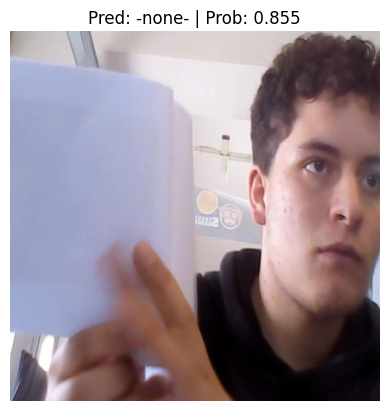

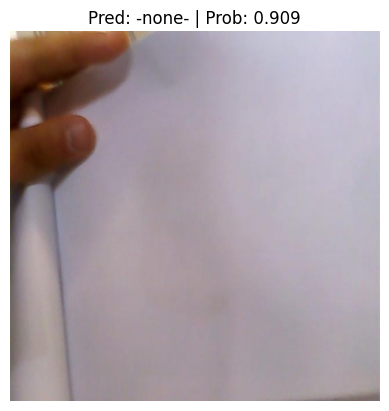

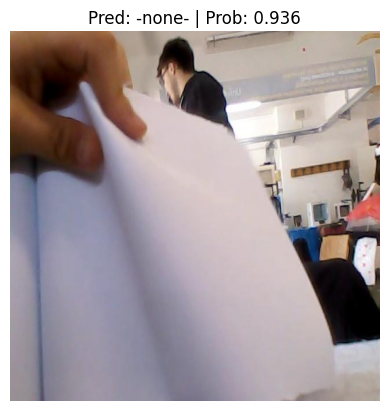

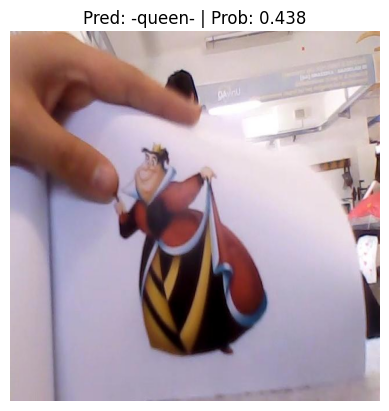

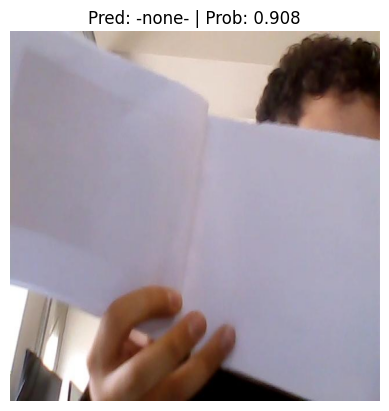

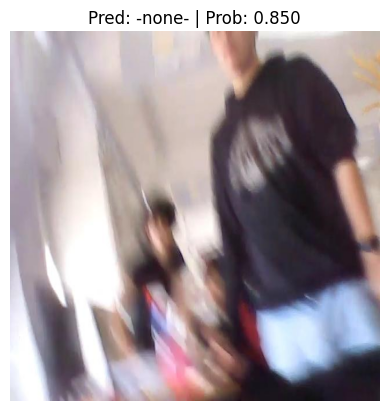

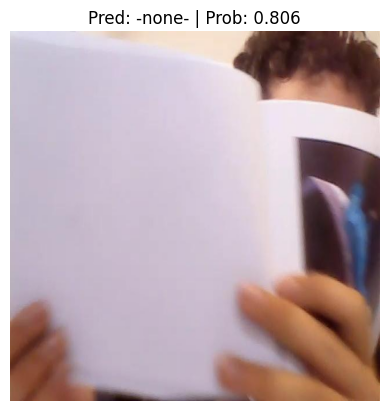

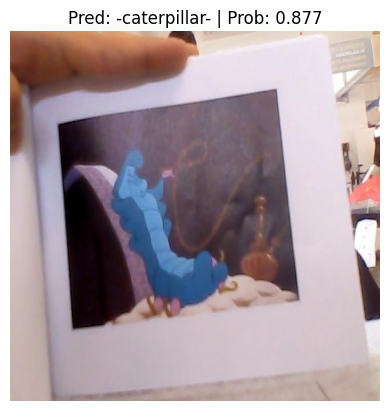

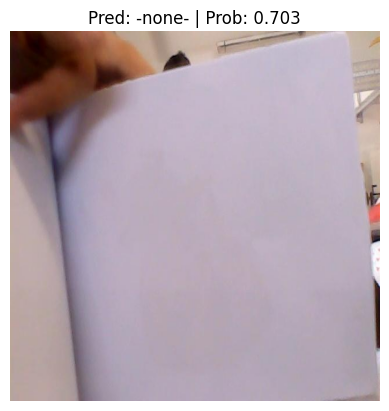

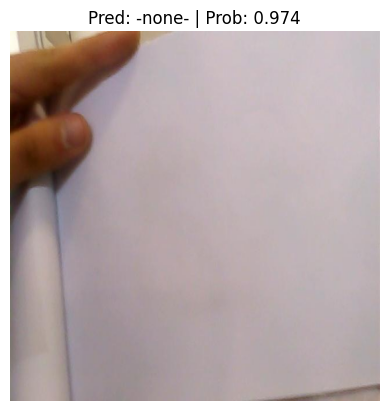

In [20]:
# Get a random list of image paths from test set
import random
from pathlib import Path

num_images_to_plot = 10
test_image_path_list = list(Path(validDir).glob("*/*.jpg")) # get list all image paths from test data
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model,
                        image_path=image_path,
                        class_names=classNames,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))

**Save the model's state dict**

In [21]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "WonderlandEfficentNet.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/WonderlandEfficentNet.pth


**Export Model labels**

In [23]:
# Save the class names to a text file
with open("models/labels.txt", "w") as f:
    for class_name in classNames:
        f.write(f"{class_name}\n")

print("Labels saved to labels.txt")

Labels saved to labels.txt


**TODO**
*   Fare inference in locale
*   Fare inference in locale su RPi
